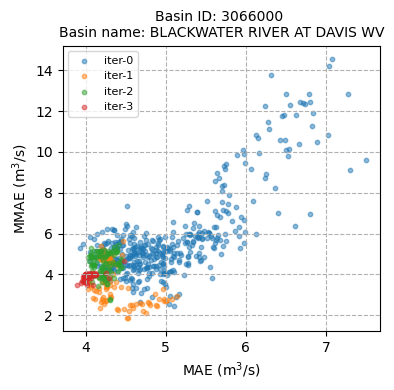

In [63]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

file_level1 = '/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info_supplment.csv'
df_info = pd.read_csv(file_level1)

# Define the file path pattern for the CSV files
basin = 190
# basin = 200

iternum = 4
inpath = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange'
bid = df_info.iloc[basin]['site_no']
bnm = df_info.iloc[basin]['station_nm']

# Get all CSV files matching the pattern
csv_files = []
for i in range(iternum):
    csv_files.append(f'{inpath}/level1_{basin}_MOASMOcalib/ctsm_outputs_emutest/iter{i}_many_metric.csv')

# Create a figure for the scatter plot
fig, ax = plt.subplots(figsize=(4, 4))

# Loop over each CSV file and plot the scatter plot of mae vs mmae
for i in range(iternum):
    file = csv_files[i]
    # Read the CSV file
    df = pd.read_csv(file)

    # Extract the 'mae' and 'mmae' columns (assuming they exist in the files)
    if 'mae' in df.columns and 'max_mon_abs_err' in df.columns:
        # Scatter plot for mae vs mmae
        ax.scatter(df['mae'], df['max_mon_abs_err'], label=f'iter-{i}', s=10, alpha=0.5)

# Set plot labels and title
ax.set_xlabel('MAE (m$^3$/s)') 
ax.set_ylabel('MMAE (m$^3$/s)') 
ax.set_title(f'Basin ID: {bid} \nBasin name: {bnm}', fontsize=10)

# Add legend with file names (iter0, iter1, iter2, iter3)
ax.legend(loc='best', fontsize=8)
ax.grid('on',linestyle='--')

# Display the plot
plt.tight_layout()
# plt.show()

# Optionally, save the plot as an image
plt.savefig(f'mae_mmae_scatter_{basin}_{bid}.png', dpi=600, bbox_inches='tight', pad_inches=0)
